In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (15, 10)

# Lab 2 problem 1

Assume that over one day the average cosmic-ray background is 7 and the average number of gamma-rays from the source of interest is 13.

A) How does the probability distribution of the cosmic-ray background change over time?

In [3]:
mu = 7
x = np.arange(stats.poisson.ppf(0.0001, mu), stats.poisson.ppf(0.999999, mu))
pmf = stats.poisson.pmf(x, mu)

Sum of poisson distributions is equal to a poisson of the summed means so for a distribution over 5 days:

In [4]:
x5 = np.arange(stats.poisson.ppf(0.0001, mu*5), stats.poisson.ppf(0.999999, mu*5))
pmf5 = stats.poisson.pmf(x5, mu*5)

Now let's compare the two distributions to see how the distribution changes over time.

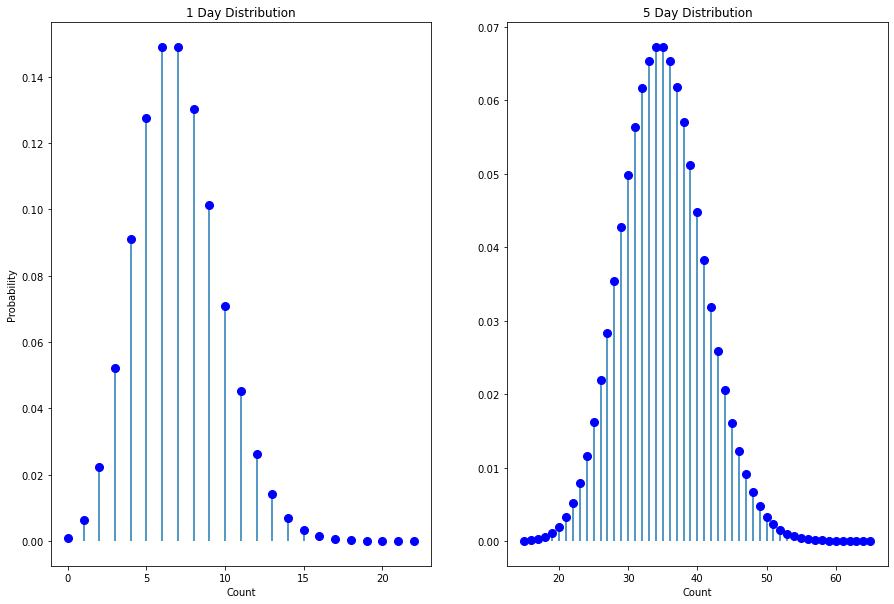

In [5]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set_ylabel('Probability')
ax1.set_xlabel('Count')
ax1.set_title('1 Day Distribution')
ax2.set_xlabel('Count')
ax2.set_title('5 Day Distribution')

ax1.plot(x, pmf, 'bo', ms = 8)
ax1.vlines(x, 0, pmf)


ax2.plot(x5, pmf5, 'bo', ms=8)
ax2.vlines(x5, 0, pmf5)

B) After five days the summed distribution still follows a poisson distribution. This is due to the concept used to determine the 5 day distribution, that the sum of poisson distributions is equal to a poisson distribution with a mean of the sum of means. This is further confirmed by using convolution to determine the pmf of the 5 day distribution, which should give the same distribution as seen above.

In [6]:
out = pmf
for _ in range(4):
    out = np.convolve(out, pmf)
print(max(out), max(pmf5)) #sanity check
print(len(out))

0.06727319161805195 0.06727319239963186
111


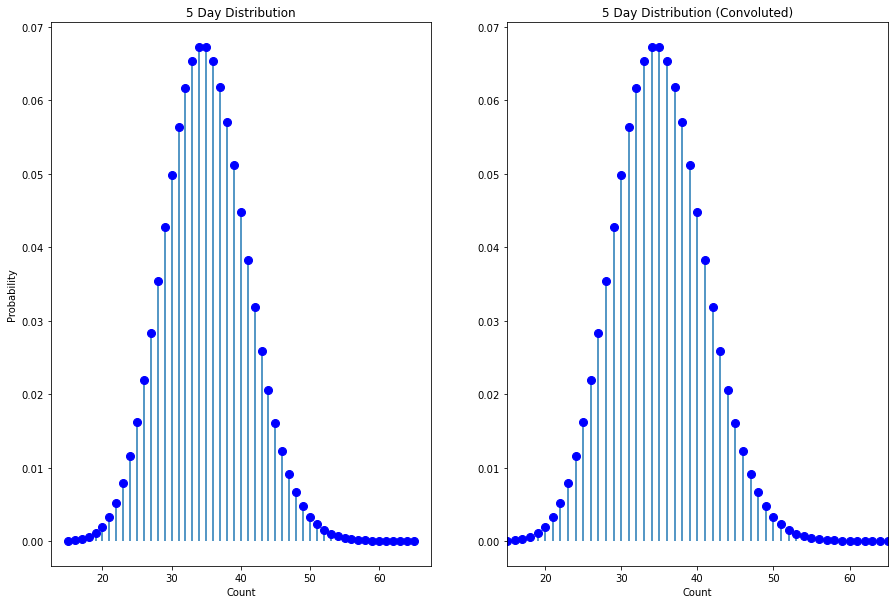

In [7]:
fig, (ax1, ax2) = plt.subplots(1,2)

ax1.set_ylabel('Probability')
ax1.set_xlabel('Count')
ax1.set_title('5 Day Distribution')
ax2.set_xlabel('Count')
ax2.set_title('5 Day Distribution (Convoluted)')

ax1.plot(x5, pmf5, 'bo', ms = 8)
ax1.vlines(x5, 0, pmf5)

ax2.set_xlim([min(x5), max(x5)])
ax2.plot(range(111), out, 'bo', ms=8)
ax2.vlines(range(111), 0, out)

Upon visual inspection, the two plots appear to be identical, or at the very least indistinguishable. In order to quantify the difference, I'll take the rms difference.

In [8]:
sum = 0
for i, y in enumerate(pmf5):
    sum += (y - out[int(x5[i])])**2
diff = np.sqrt(sum/len(pmf5))
print(diff)

2.181451429495559e-07


The rms makes it apparent that the summed probability is still a poisson distribution. The summed probability, found through convolution, has a negligible difference between itself and a poisson distribution of the same mean.

C) When averaging, the probability distribution evolves in the same way as summing, however the x-axis is rescaled to the values of the initial distribution. So for example over 5 days the average would be:

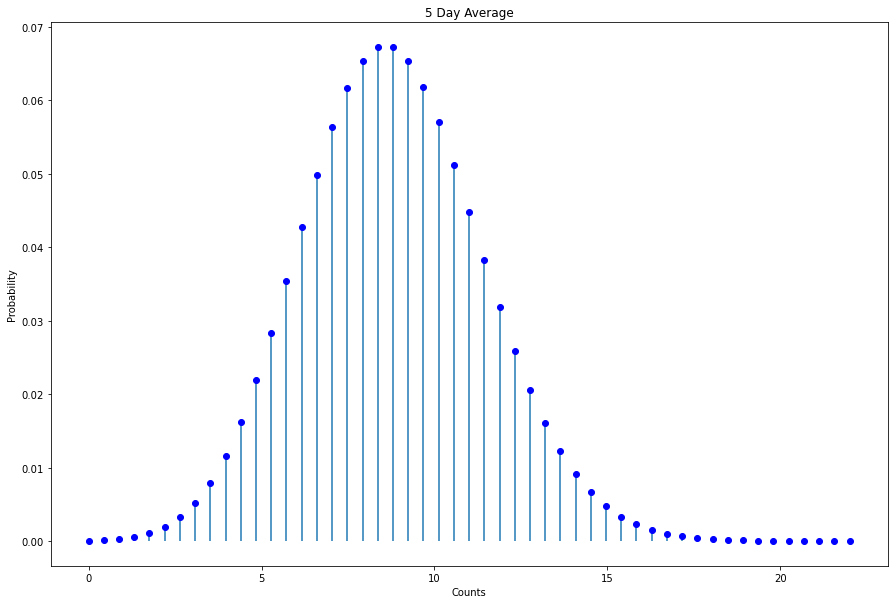

In [9]:
fig, ax = plt.subplots(1,1)

ax.set_xlabel('Counts')
ax.set_ylabel('Probability')
ax.set_title('5 Day Average')
xave5 = np.linspace(min(x), max(x), len(pmf5))
ax.plot(xave5, pmf5, 'bo')
ax.vlines(xave5, 0, pmf5)

Let's compare this to the single poisson distribution and the 10 day average:

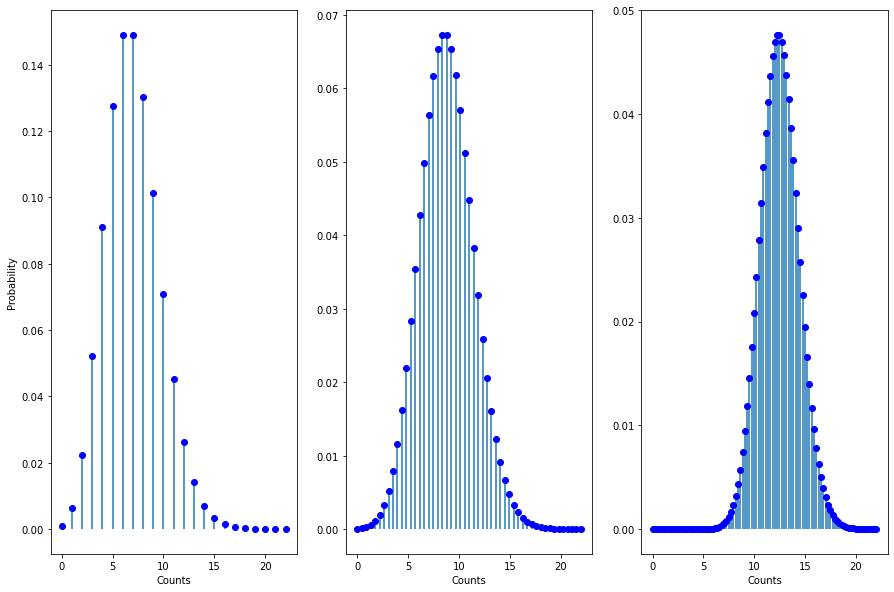

In [10]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
x10 = np.arange(stats.poisson.ppf(0.0001, mu*5), stats.poisson.ppf(0.999999, mu*10))
pmf10 = stats.poisson.pmf(x10,mu*10)
xave10 = np.linspace(min(x),max(x),len(pmf10))
ax1.set_ylabel('Probability')
ax1.set_xlabel('Counts')
ax2.set_xlabel('Counts')
ax3.set_xlabel('Counts')

ax1.plot(x, pmf, 'bo')
ax1.vlines(x, 0, pmf)
ax2.plot(xave5, pmf5, 'bo')
ax2.vlines(xave5, 0, pmf5)
ax3.plot(xave10, pmf10, 'bo')
ax3.vlines(xave10, 0, pmf10)

As can be seen here, the distributions begin to appear more and more continuous and gaussian as the time they're averaged over increases. This falls in line with the central limit theorem which states "when independent random variables are summed up, their properly normalized sum tends toward a normal distribution even if the original variables themselves are not normally distributed." This seems to conflict with part B, where we asserted that the 5 day sum is also poisson, and any sum of poissons is still poisson. Despite this, there is no defined cutoff point between when a sum of distributions stops being poisson and becomes gaussian. The case is rather that, as the distribution is summed a greater number of times, the distribution tends more and more towards a normal distribution.

D) Over 5 days, 65 gamma rays were detected from the source of interest. What is the corresponding sigma value of this observation?

In [11]:
prob = stats.poisson.cdf(65, mu*5)

sigma = stats.norm.ppf(prob)
print(sigma)

4.61843303246276


# Problem 2
Using a Rayleigh distribution to describe the background interval:
A) How does the distribution change when averaging over a greater number of observing intervals?

In [12]:
x = np.linspace(stats.rayleigh.ppf(0.0001),stats.rayleigh.ppf(.999999),1000)

pdf = stats.rayleigh.pdf(x)

pdf5 = pdf
for _ in range(4):
    pdf5 = np.convolve(pdf5, pdf)

x5 = np.linspace(min(x),max(x),len(pdf5))

pdf10 = pdf5
for _ in range(5):
    pdf10 = np.convolve(pdf10, pdf)
    
x10 = np.linspace(min(x),max(x),len(pdf10))

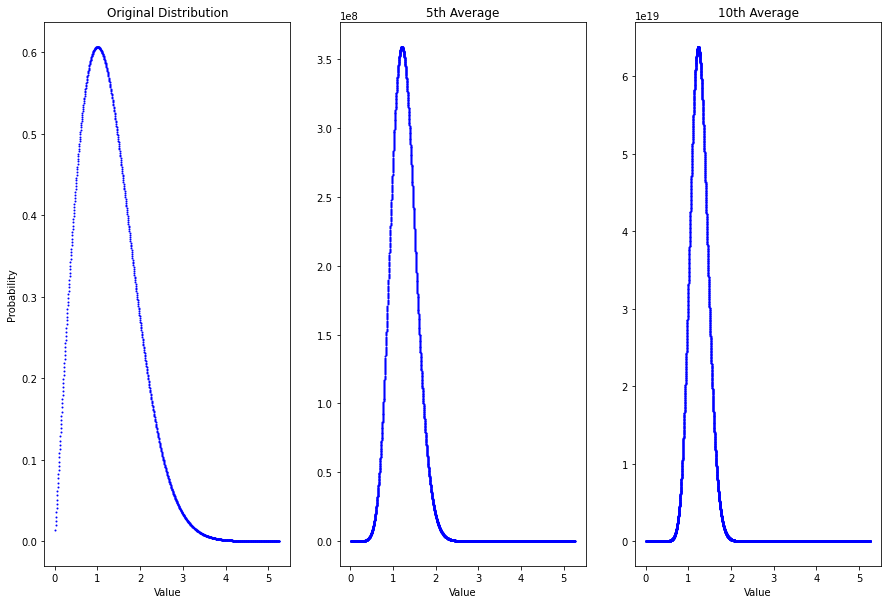

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)

ax1.set_title('Original Distribution')
ax1.set_ylabel('Probability')
ax1.set_xlabel('Value')
ax2.set_title('5th Average')
ax2.set_xlabel('Value')
ax3.set_title('10th Average')
ax3.set_xlabel('Value')

ax1.plot(x, pdf, 'bo', ms=1)
ax2.plot(x5, pdf5, 'bo', ms=1)
ax3.plot(x10, pdf10, 'bo', ms=1)

B) As shown here, as the distribution becomes more and more convoluted, the distribution tends towards a normal distribution. While on the 5th average there is still some lean towards the left, by the 10th average, the distribution is indistinguishable from a normal distribution.

# Problem 3

Version 1A) It seems that this questions is asking, in more simple terms, given a potential signal Y, determined to be a value of 1.54, what is the probability that it is not a part of the given background, a normal distribution of mean 0 and standard deviation 0.5?

In [14]:
d = stats.norm.rvs(scale=0.5, size = 100000)

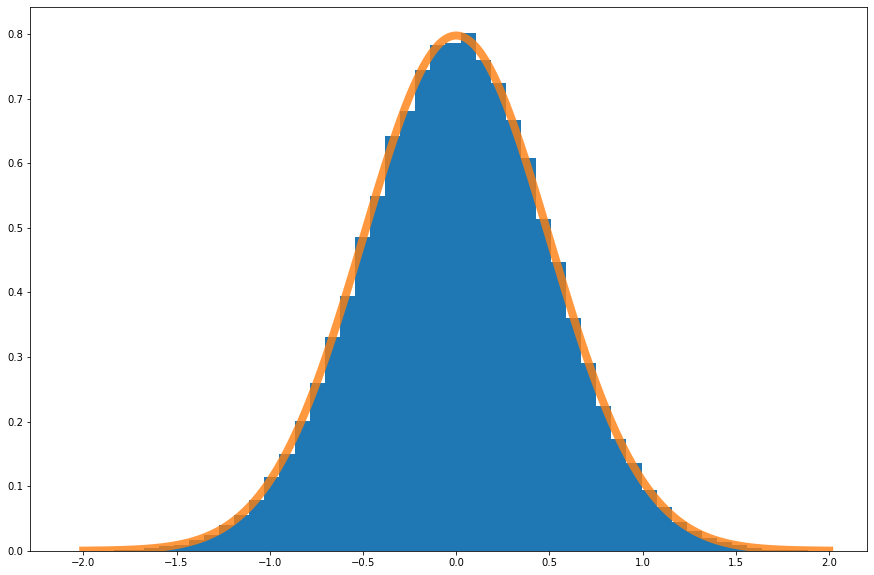

In [15]:
fig, ax = plt.subplots(1,1)

ax.hist(d,50,density=True)
x = np.linspace(-2, 2,1000)
ax.plot(x,stats.norm.pdf(x,scale=0.5), linewidth=8, alpha=0.8)

In [16]:
prob = stats.norm.cdf(1.54, scale=0.5)

sigma = stats.norm.ppf(prob)
print(sigma)

3.0799999999999956


This result is well under the standard 5 sigma cutoff used to determine if a result is significant or not. As such, we cannot confidently say this potential signal is not produced by our background.

Version 2B/C) If we must look for our signal not in one pixel, but 10,000 pixels, our background will now be defined by the original multiplied by 10,000. So we must now ask what is the probability of our signal not being produced by background with a background defined by the distribution below?

In [34]:
needed_prob = stats.norm.cdf(5)
needed_sigma = -1 * stats.norm.ppf((1-needed_prob)/10000)
print(needed_sigma)


6.550537612682236


After looking through 10,000 pixels, the needed sigma relative to the number of times we have searched is 6.55. This is still greater than the sigma of our signal after searching only once, so the results are still not significant enough to warrant calling this a new discovery.

# Problem 4

A) The signal required for a 5 sigma detection in problem one is equal to:

In [35]:
required_prob = stats.norm.cdf(5)
required_signal = stats.norm.ppf(required_prob, scale=0.5)
print(required_signal)

2.499999999985088


B) The sigma required for an equivalently significant result as in version one is equal to:

In [38]:
required_prob = stats.norm.cdf(needed_sigma)
required_signal = stats.norm.ppf(required_prob, scale=0.5)
print(required_signal)

3.2752687434458276


C) The required signal increases by a factor of 1.23. This is due to the fact that on the fringes of the distribution, small changes in the signal result in large changes in the resultant sigma, so even though the trials factor is 10,000, the change in the corresponding value of the signal is not nearly as large. 

D) Due to the same reasons as above, increasing the trials factor my orders of magnitude will lead to increasingly small changes on the 5-sigma threshold